## Data Cleaning and Exploration

### Loading Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [59]:
#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer


#Required data visualisation libraries are imported
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading in Dataset

In [3]:
df = pd.read_csv('./data/Womens Clothing E-Commerce Reviews 2.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Initial Data Cleaning

In [6]:
#checking my initial data types and null counts

In [7]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
#droping rows that do not contain review text; only about 3.6% of data

In [9]:
df = df[df['Review Text'].isna()==False]

In [10]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [11]:
#currently at 22,641 columns

In [12]:
#dropping addditional index column

In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#Checking for any duplicated reviews

In [15]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [16]:
df[df.Title.isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...
23425,430,23,NaN,A great long line bra! beautiful and well made...,4,1,1,Initmates,Intimate,Intimates
23435,262,26,NaN,Love the pattern. the pants are really cute! p...,4,1,0,General Petite,Intimate,Lounge
23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses


In [17]:
#although there are many NaNs in the "Title" column, we will not be utilizng this column for classification; will keep
#these rows since they contain "Review Text" content

In [18]:
df[df['Division Name'].isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [19]:
#although these rows are all missing Division Name, Department Name, and Class Name, they contain
#Review Text so I will keep these rows

In [20]:
#checking for any duplicated reviews

In [21]:
df.duplicated().value_counts()

False    22640
True         1
dtype: int64

In [22]:
#it looks like there is one duplicate entry; locating that entry

In [23]:
df[df.duplicated() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


In [24]:
#dropping the duplicated review

In [25]:
df.drop(21888, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [27]:
#confirming df has one less row, drop was successful

### Initial Data Exploration

In [28]:
#quick plots of each column

In [29]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-29-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


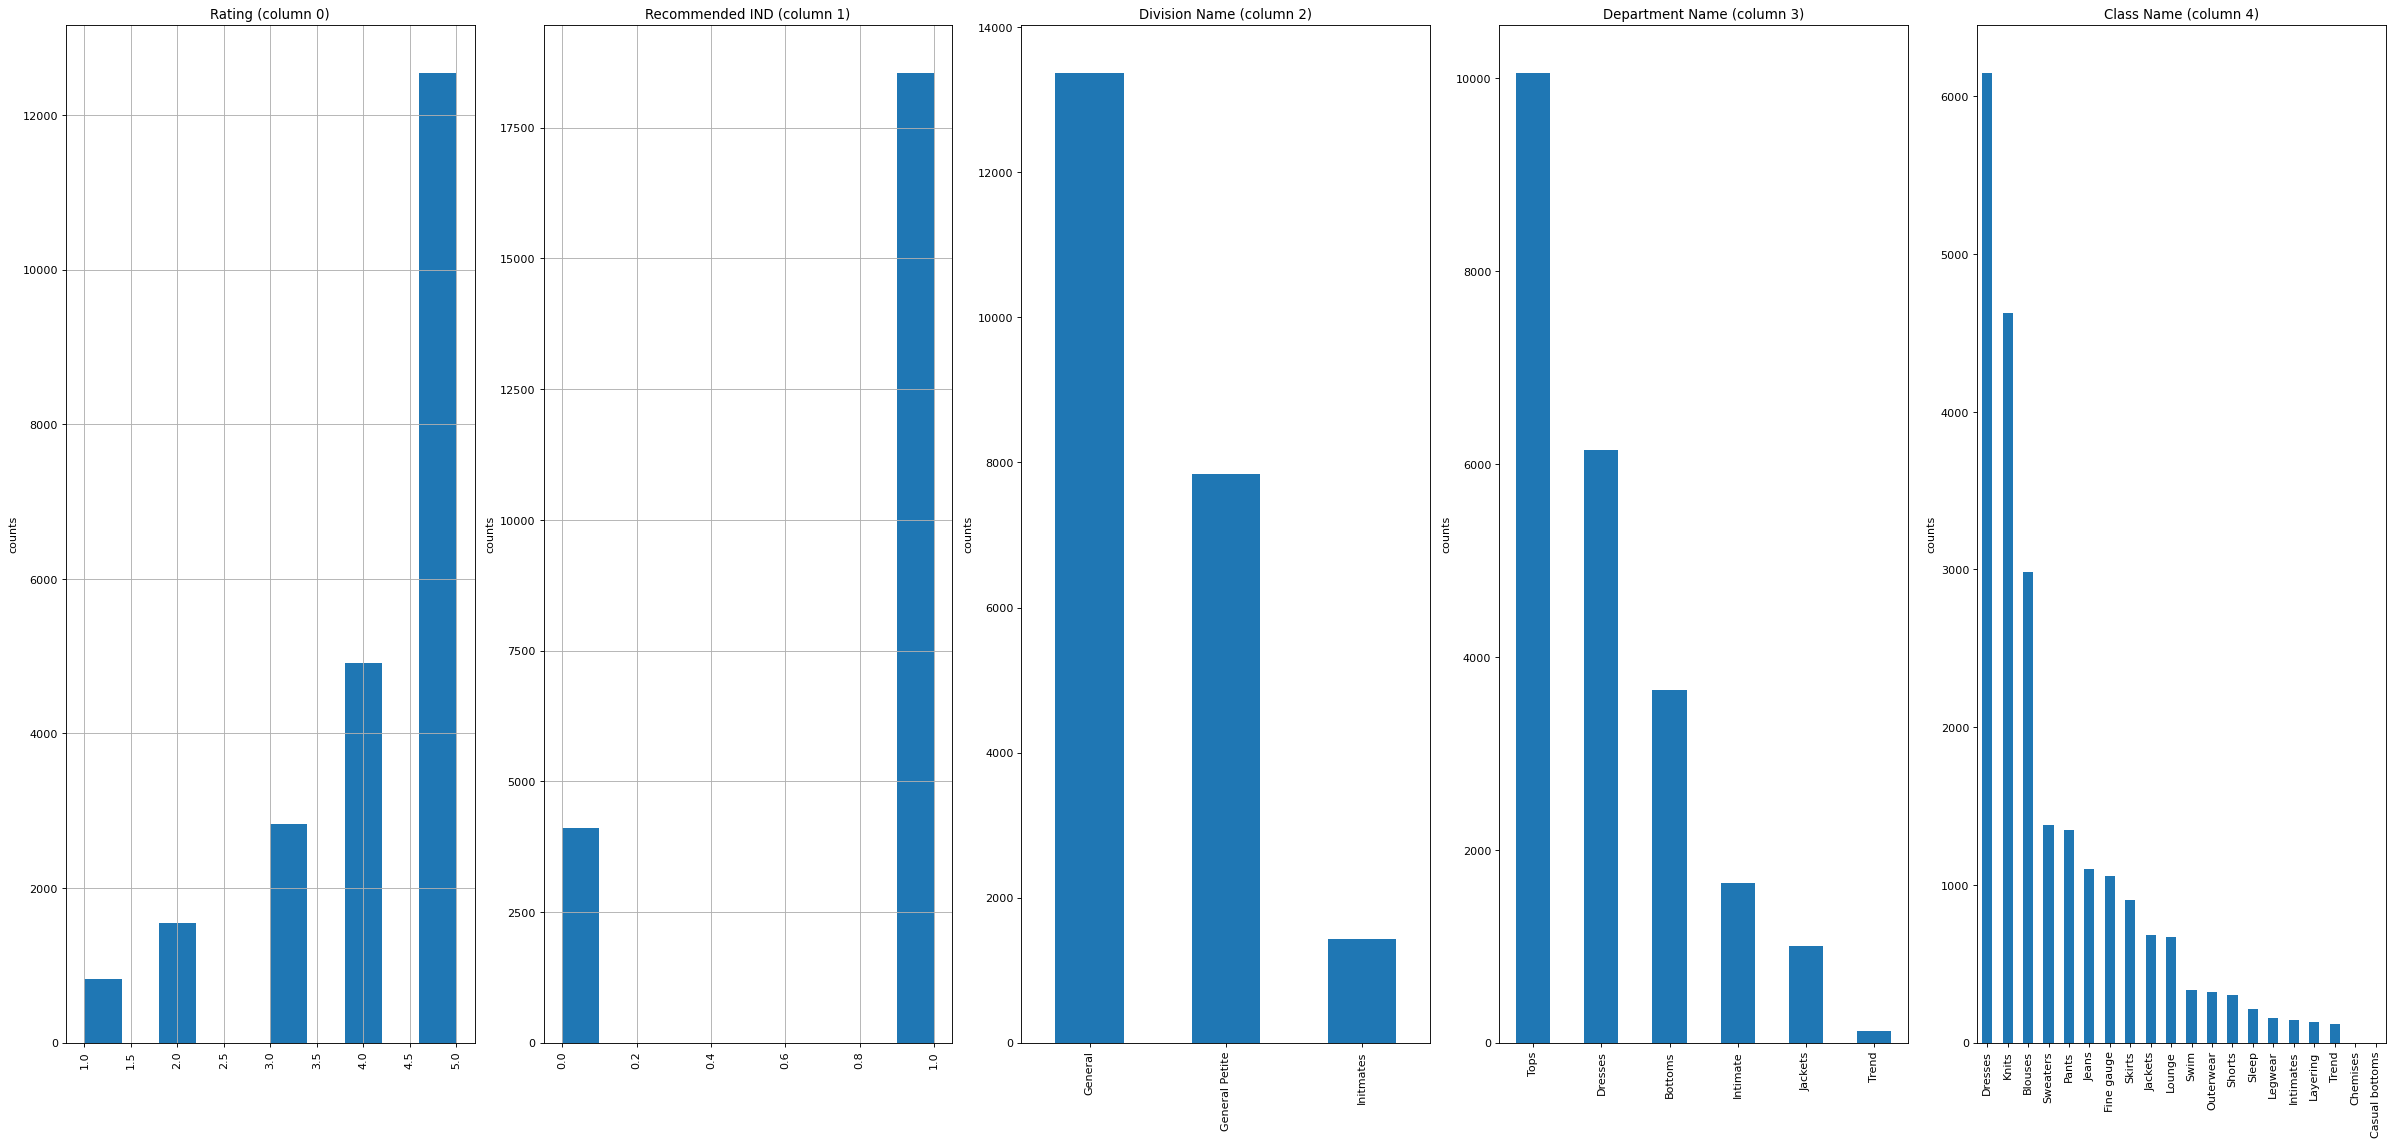

In [30]:
plotPerColumnDistribution(df, 10, 5)

In [31]:
#looking at distribution of age for background knowledge

In [32]:
df.Age.describe()

count    22640.000000
mean        43.280654
std         12.327181
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

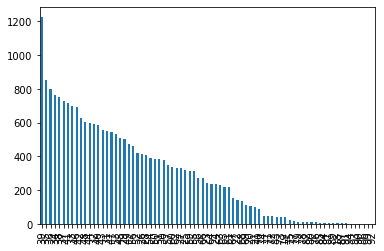

In [33]:
df.Age.value_counts().plot(kind='bar');

In [34]:
#looking at distribution of rating for background knowledge

In [35]:
df.Rating.describe()

count    22640.000000
mean         4.183525
std          1.115774
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [36]:
df.Rating.value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

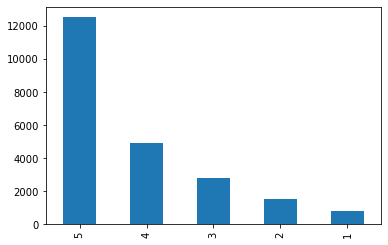

In [37]:
df.Rating.value_counts().plot(kind = 'bar');

In [38]:
#created better visualiztion for presentation purposes

In [39]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
init_notebook_mode(connected=True)

data = df['Rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/reviews_distribution.png", scale=5)

In [40]:
#looking at distribution of Recommend Ind

In [41]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

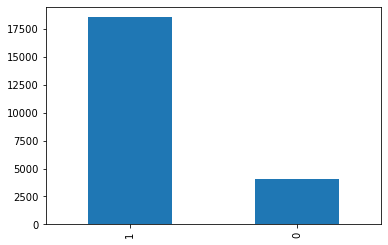

In [42]:
df['Recommended IND'].value_counts().plot(kind = 'bar');

In [43]:
#created better visualiztion for presentation purposes

In [44]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
init_notebook_mode(connected=True)

data = df['Recommended IND'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews for Recommended or Not'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

fig.write_image("./images/recommendedIND_distribution.png", scale=5)

In [45]:
#large skew in our data; most of our data is recommended and a high % of our data received a rating of "5"

In [46]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

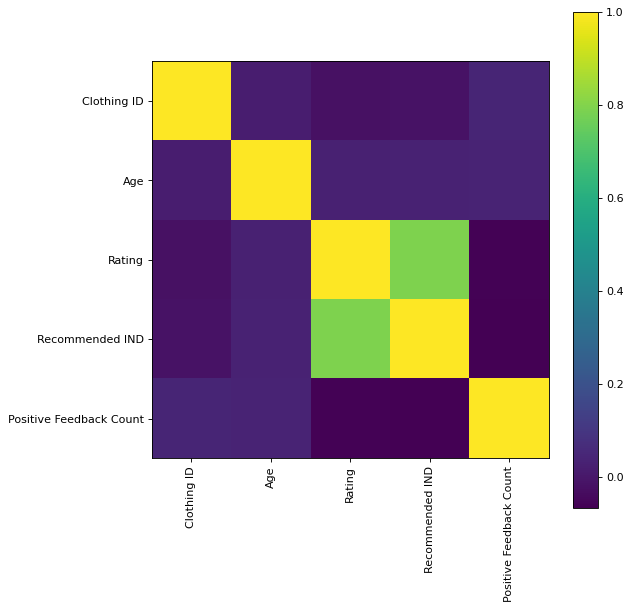

In [47]:
plotCorrelationMatrix(df, 8);

In [48]:
#would expect Recmomended IND and Rating to be positively correlated, which they are

In [49]:
#adding polarity and subjectivity column so I can visualize how these columns change after preprocessing

In [50]:
from textblob import TextBlob
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).polarity)
df['Subjective'] = df['Review Text'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-50-237c8c806210>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-237c8c806210>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjective
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


## Text Preprocessing

In [52]:
#Changing variables headers to remove spaces for modelling
df = df.rename(columns={'Clothing ID' : 'Clothing_ID', 'Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count':'Positive_Feedback_Count', 'Division Name': 'Division_Name', 'Class Name': 'Class_Name'})

In [53]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750


In [54]:
#Created new column for Proprecessed text and converted Review_Text to string type

In [55]:
df["Clean"] = df["Review_Text"].astype(str)

In [56]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,Absolutely wonderful - silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,Love this dress! it's sooo pretty. i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,I had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,This shirt is very flattering to all due to th...


In [57]:
#Creating function to complete text preprocessing steps

In [60]:
# Need to remove capitalization and punctuation

# Create a tokenizer 
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)

# Create list of stopwords in English (language of the reviews)
# Remove "very" from the list of stopwords 
stopwords_list = stopwords.words("english")
# Remove "very" from the list of stopwords 
stopwords_list.remove("very")

# Create an instance of nltk's WordNetLemmatizer with the variable name `lemmatizer`
lemmatizer = WordNetLemmatizer()

In [61]:
def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):
    # Standardize case (lowercase the text)
    lowered_text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(lowered_text)
    
    # Remove stopwords using `stopwords_list and removing punctuation`
    stopped_tokens = [word for word in tokens if word not in stopwords_list or word not in string.punctuation]
    
    # Stem the tokenized text using `stemmer`
    lemmatized_text = [lemmatizer.lemmatize(token) for token in stopped_tokens]
    
    # Return the preprocessed text
    return lemmatized_text

In [62]:
# Apply the preprocess function to the entire review text
df['Clean'] = df['Clean'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))


In [63]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Polarity,Subjective,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333,"[absolutely, wonderful, silky, and, sexy, and,..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,0.725000,"[love, this, dress, it's, sooo, pretty, i, hap..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,"[i, had, such, high, hope, for, this, dress, a..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,"[i, love, love, love, this, jumpsuit, it's, fu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,"[this, shirt, is, very, flattering, to, all, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,0.710000,"[i, wa, very, happy, to, snag, this, dress, at..."
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.708333,"[it, reminds, me, of, maternity, clothes, soft..."
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,0.596429,"[this, fit, well, but, the, top, wa, very, see..."
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.577778,"[i, bought, this, dress, for, a, wedding, i, h..."
